<a href="https://colab.research.google.com/github/astrodatos/proyecto_aape/blob/master/proyecto_AAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from astropy.io import fits
from astropy.wcs import WCS

filename = ('/content/gdrive/My Drive/Colab Notebooks/dr9q_fit.fits')
hdu_fits = fits.open(filename)
hdu = fits.open(filename)[1]
header = hdu.header
wcs = WCS(header)
print (wcs)

data=hdu.data
print (data)

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 686  87822
[('000000.47-002703.9', 1.97831659e-03, -0.45108829, 4216, 310, 55477, 0.24995296, 0.25 , -1.        , -1.00000000e+00, -1.        , -1.        , -1.00000000e+00, -1.        , -1.        ,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1.,    0.        , -1.,  0.        , -1., -300000.        , -1.,   0.        , -1.,     0.        , -1.,  0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 0.00000000e+00, -1.,   0.        , -1.,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 2298.67000834, -1., 64.27742969, -1.,  1.64958607e+02, -1., -14.65182438, -1., 2.23529114, -1., -16.11066829, -1., 254.741708, -1., 26.34479015, -1., -15.04412284, -1., -5.4489311e+01, -1., -13.12042921, -1., -12.90400265, -1., -12.7601818 , -1., [ 3.32646096, -0.375910

In [0]:
from astropy.table import Table
import pandas as pd

table=Table.read(hdu_fits)
#table.colnames
table
#table['SDSS_NAME', 'PLATE']

SDSS_NAME,RA,DEC,PLATE,FIBER,MJD,Z_PIPE,Z_VI,Z_PCA,FWHM_CIV_FPG,REW_CIV_FPG,REW_CIV_ERR_FPG,FWHM_MGII_FPG,REW_MGII_FPG,REW_MGII_ERR_FPG,FWHM_CIV,FWHM_CIV_ERR,REW_CIV,REW_CIV_ERR,VOFF_CIV,VOFF_CIV_ERR,LOGF_CIV,LOGF_CIV_ERR,FWHM_CIII,FWHM_CIII_ERR,REW_CIII,REW_CIII_ERR,VOFF_CIII,VOFF_CIII_ERR,LOGF_CIII,LOGF_CIII_ERR,FWHM_ALIII,FWHM_ALIII_ERR,REW_ALIII,REW_ALIII_ERR,VOFF_ALIII,VOFF_ALIII_ERR,LOGF_ALIII,LOGF_ALIII_ERR,REW_SIIII,REW_SIIII_ERR,LOGF_SIIII,LOGF_SIIII_ERR,FWHM_MGII,FWHM_MGII_ERR,REW_MGII,REW_MGII_ERR,VOFF_MGII,VOFF_MGII_ERR,LOGF_MGII,LOGF_MGII_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,REW_BROAD_HB,REW_BROAD_HB_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,LOGF_BROAD_HB,LOGF_BROAD_HB_ERR,REW_NARROW_HB,REW_NARROW_HB_ERR,LOGF_NARROW_HB,LOGF_NARROW_HB_ERR,FWHM_OIII_5007,FWHM_OIII_5007_ERR,REW_OIII_5007,REW_OIII_5007_ERR,LOGF_OIII_5007,LOGF_OIII_5007_ERR,VOFF_OIII_5007,VOFF_OIII_5007_ERR,LOGF1350,LOGF1350_ERR,LOGF3000,LOGF3000_ERR,LOGF5100,LOGF5100_ERR,CONTI_FIT [2],CONTI_FIT_ERR [2],CONTI_REDCHI2,CONTI_STATUS,LINE_REDCHI2,LINE_STATUS,LINE_NPIX_HB,LINE_NPIX_MGII,LINE_NPIX_CIII,LINE_NPIX_CIV
str18,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32,int32,int32,int32,int32
000000.47-002703.9,0.0019783165939202263,-0.45108829471677764,4216,310,55477,0.24995295703411102,0.25,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,2298.670008340593,-1.0,64.2774296887242,-1.0,164.95860656420774,-1.0,-14.65182438231868,-1.0,2.2352911356404155,-1.0,-16.110668291496495,-1.0,254.74170800292904,-1.0,26.344790150755056,-1.0,-15.04412284248246,-1.0,-54.48931101084666,-1.0,-13.120429210786082,-1.0,-12.904002646679636,-1.0,-12.760181804702583,-1.0,3.3264609558185136 .. -0.3759101100717362,0.07121186279526269 .. 0.03079669808147335,1.1498423548947068,1,1.089666039538195,1,306,69,0,0
000001.93-001427.4,0.008066691350313349,-0.24097078525990853,4216,312,55477,2.1645307540893555,2.163,2.1600770125260818,6538.162600803452,29.02243738994315,0.8729704914045182,5143.809749376881,37.58693277814791,1.4014457383956558,6848.385659787697,-1.0,34.819425782128825,-1.0,1463.2733787650475,-1.0,-14.365271657331485,-1.0,5498.158141824284,-1.0,8.844850998221855,-1.0,442.0082711821357,-1.0,-15.148776656013794,-1.0,14119.02569616,-1.0,2.8667426458471046,-1.0,-270.1125592626993,-1.0,-15.615987159317584,-1.0,24.748892384141914,-1.0,-14.696218911079507,-1.0,4060.2090551234855,-1.0,24.310904980047667,-1.0,-87.63692867982165,-1.0,-15.051001058208485,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-300000.0,-1.0,-12.658990276491146,-1.0,-13.021065130436128,-1.0,-13.261672888398198,-1.0,1.0034697711159482 .. -2.0440828124646395,0.015840020377284526 .. 0.025177912718590403,0.9713016643443894,1,0.9422764509582113,1,0,151,332,269
000003.17+011510.6,0.013228998987813156,1.252967112275887,4296,364,55499,2.354281187057495,2.354,2.352232606583584,6492.384357066751,32.81777037773185,0.8728156905140997,6756.701147290911,52.07487500071067,3.9438540244499483,5570.605482314154,-1.0,41.747326283768736,-1.0,255.91092717153472,-1.0,-14.665869568966045,-1.0,9907.701877431762,-1.0,33.02961837894193,-1.0,-502.73772883324756,-1.0,-14.992532227472173,-1.0,14119.02569616,-1.0,14.366843448009691,-1.0,998.308891800016

In [0]:
QuasarTable= table['SDSS_NAME','Z_VI', 'LOGF_CIV','LOGF_CIV_ERR',
                   'LOGF_CIII','LOGF_CIII_ERR','LOGF_ALIII','LOGF_ALIII_ERR',
                   'LOGF_SIIII','LOGF_SIIII_ERR','LOGF_MGII','LOGF_MGII_ERR',
                   'LOGF_BROAD_HB','LOGF_BROAD_HB_ERR','LOGF_NARROW_HB',
                   'LOGF_NARROW_HB_ERR','LOGF_OIII_5007','LOGF_OIII_5007_ERR',
                   'LOGF1350','LOGF1350_ERR','LOGF3000','LOGF3000_ERR','LOGF5100',
                   'LOGF5100_ERR']
QuasarTable['class']='QUASAR'
QuasarTable

SDSS_NAME,Z_VI,LOGF_CIV,LOGF_CIV_ERR,LOGF_CIII,LOGF_CIII_ERR,LOGF_ALIII,LOGF_ALIII_ERR,LOGF_SIIII,LOGF_SIIII_ERR,LOGF_MGII,LOGF_MGII_ERR,LOGF_BROAD_HB,LOGF_BROAD_HB_ERR,LOGF_NARROW_HB,LOGF_NARROW_HB_ERR,LOGF_OIII_5007,LOGF_OIII_5007_ERR,LOGF1350,LOGF1350_ERR,LOGF3000,LOGF3000_ERR,LOGF5100,LOGF5100_ERR,class
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6
000000.47-002703.9,0.25,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-14.65182438231868,-1.0,-16.110668291496495,-1.0,-15.04412284248246,-1.0,-13.120429210786082,-1.0,-12.904002646679636,-1.0,-12.760181804702583,-1.0,QUASAR
000001.93-001427.4,2.163,-14.365271657331485,-1.0,-15.148776656013794,-1.0,-15.615987159317584,-1.0,-14.696218911079507,-1.0,-15.051001058208485,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-12.658990276491146,-1.0,-13.021065130436128,-1.0,-13.261672888398198,-1.0,QUASAR
000003.17+011510.6,2.354,-14.665869568966045,-1.0,-14.992532227472173,-1.0,-15.319727770673868,-1.0,0.0,-1.0,-15.341535565628329,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.01066628984442,-1.0,-13.513841123176414,-1.0,-13.848213331552273,-1.0,QUASAR
000004.61+035122.4,2.795,-14.668890299079425,-1.0,-15.211973046561669,-1.0,-15.79280866543717,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.592787490749963,-1.0,-13.661024457420178,-1.0,-13.70636962122199,-1.0,QUASAR
000004.96-001642,2.879,-14.931736862166844,-1.0,-15.242458029703393,-1.0,-15.81921541286709,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.639728082120913,-1.0,-13.839519170035096,-1.0,-13.972285323773956,-1.0,QUASAR
000005.02-003829,2.662,-14.737058325267366,-1.0,-15.052214167147367,-1.0,-15.312190374673959,-1.0,-15.847419215921606,-1.0,-14.202602873642363,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.337832439337294,-1.0,-13.657385727857172,-1.0,-13.869736846589813,-1.0,QUASAR
000007.58+002943.2,2.254,-14.254588412916753,-1.0,-14.97676990106867,-1.0,-16.171391997120104,-1.0,0.0,-1.0,-14.704092143246513,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.13401466715044,-1.0,-13.178771900626616,-1.0,-13.208514196955552,-1.0,QUASAR
000009.27+020622,1.432,-14.019072405422975,-1.0,-14.29541770583723,-1.0,-15.069484901680504,-1.0,0.0,-1.0,-14.639071121772703,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-12.591865733638436,-1.0,-12.729344404986849,-1.0,-12.820702406019896,-1.0,QUASAR
000013.03+044403.5,2.624,-14.85711908311641,-1.0,-14.966410116104147,-1.0,-15.409649599110633,-1.0,0.0,-1.0,-15.101606422508821,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.283912874226617,-1.0,-13.449451585845008,-1.0,-13.559456182475968,-1.0,QUASAR


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
%matplotlib inline
data_quasar=QuasarTable.to_pandas()
sns.pairplot(data_quasar,hue='class' , diag_kind = 'hist')

In [0]:
QuasarTable2 = table['SDSS_NAME', 'Z_VI', 'LOGF_CIV', 'LOGF_CIII', 
                    'LOGF_ALIII', 'LOGF_SIIII', 'LOGF_MGII', 'LOGF_BROAD_HB',
                    'LOGF_NARROW_HB', 'LOGF_OIII_5007']

QuasarTable2['class']='QUASAR'
QuasarTable2

SDSS_NAME,Z_VI,LOGF_CIV,LOGF_CIII,LOGF_ALIII,LOGF_SIIII,LOGF_MGII,LOGF_BROAD_HB,LOGF_NARROW_HB,LOGF_OIII_5007,class
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6
000000.47-002703.9,0.25,0.0,0.0,0.0,0.0,0.0,-14.65182438231868,-16.110668291496495,-15.04412284248246,QUASAR
000001.93-001427.4,2.163,-14.365271657331485,-15.148776656013794,-15.615987159317584,-14.696218911079507,-15.051001058208485,0.0,0.0,0.0,QUASAR
000003.17+011510.6,2.354,-14.665869568966045,-14.992532227472173,-15.319727770673868,0.0,-15.341535565628329,0.0,0.0,0.0,QUASAR
000004.61+035122.4,2.795,-14.668890299079425,-15.211973046561669,-15.79280866543717,0.0,0.0,0.0,0.0,0.0,QUASAR
000004.96-001642,2.879,-14.931736862166844,-15.242458029703393,-15.81921541286709,0.0,0.0,0.0,0.0,0.0,QUASAR
000005.02-003829,2.662,-14.737058325267366,-15.052214167147367,-15.312190374673959,-15.847419215921606,-14.202602873642363,0.0,0.0,0.0,QUASAR
000007.58+002943.2,2.254,-14.254588412916753,-14.97676990106867,-16.171391997120104,0.0,-14.704092143246513,0.0,0.0,0.0,QUASAR
000009.27+020622,1.432,-14.019072405422975,-14.29541770583723,-15.069484901680504,0.0,-14.639071121772703,0.0,0.0,0.0,QUASAR
000013.03+044403.5,2.624,-14.85711908311641,-14.966410116104147,-15.409649599110633,0.0,-15.101606422508821,0.0,0.0,0.0,QUASAR


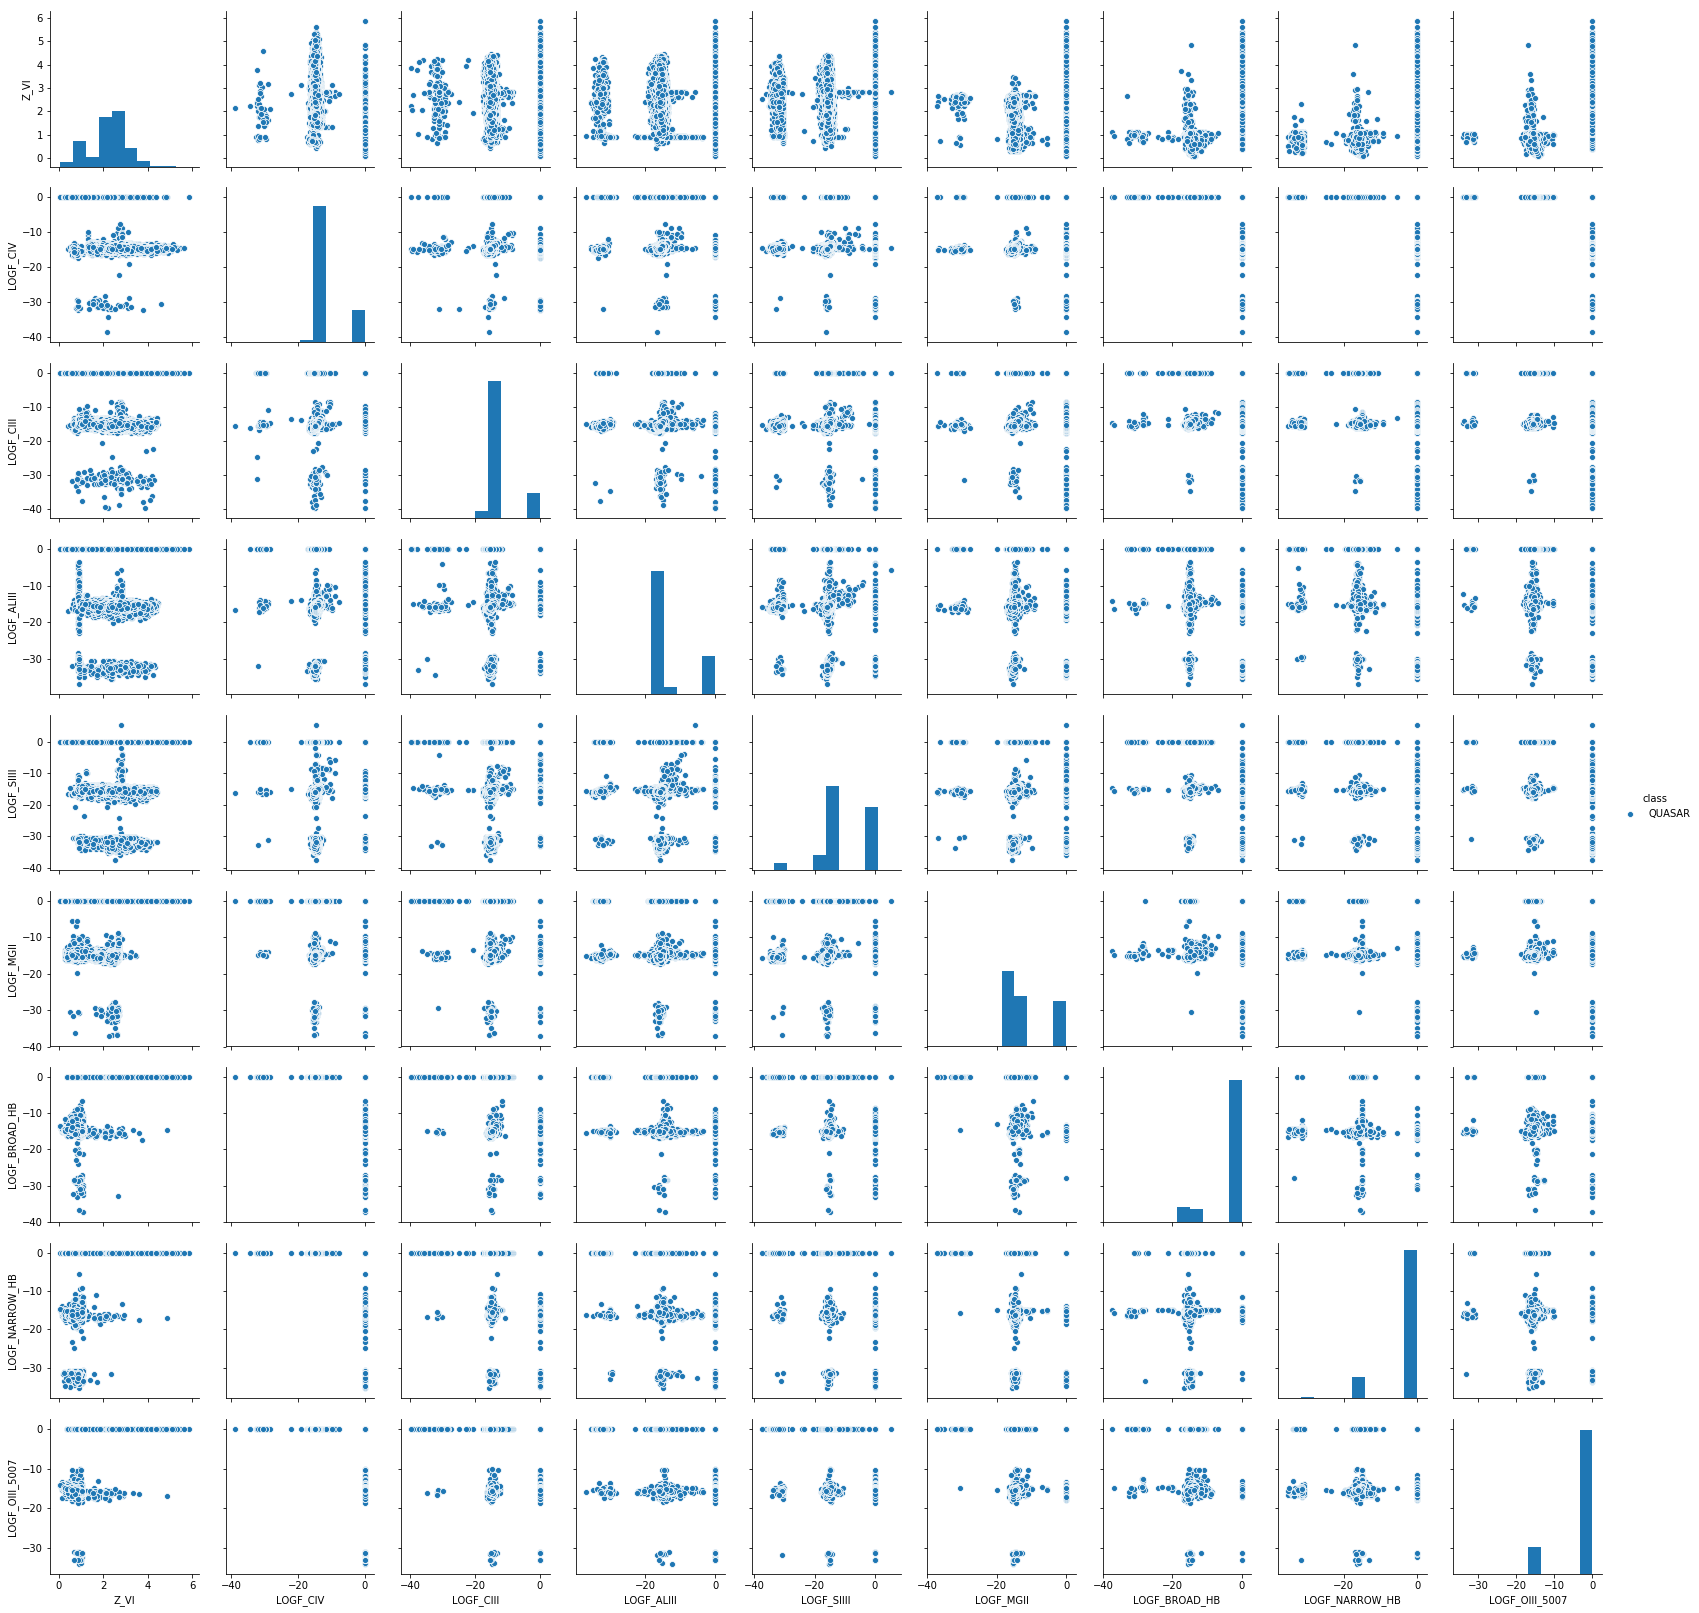

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
%matplotlib inline
data_quasar=QuasarTable2.to_pandas()
sns.pairplot(data_quasar, hue='class', diag_kind = 'hist')

In [0]:
data_quasar

,SDSS_NAME,Z_VI,LOGF_CIV,LOGF_CIII,LOGF_ALIII,LOGF_SIIII,LOGF_MGII,LOGF_BROAD_HB,LOGF_NARROW_HB,LOGF_OIII_5007,class
0,000000.47-002703.9,0.250,0.000000,0.000000,0.000000,0.000000,0.000000,-14.651824,-16.110668,-15.044123,QUASAR
1,000001.93-001427.4,2.163,-14.365272,-15.148777,-15.615987,-14.696219,-15.051001,0.000000,0.000000,0.000000,QUASAR
2,000003.17+011510.6,2.354,-14.665870,-14.992532,-15.319728,0.000000,-15.341536,0.000000,0.000000,0.000000,QUASAR
3,000004.61+035122.4,2.795,-14.668890,-15.211973,-15.792809,0.000000,0.000000,0.000000,0.000000,0.000000,QUASAR
4,000004.96-001642,2.879,-14.931737,-15.242458,-15.819215,0.000000,0.000000,0.000000,0.000000,0.000000,QUASAR
5,000005.02-003829,2.662,-14.737058,-15.052214,-15.312190,-15.847419,-14.202603,0.000000,0.000000,0.000000,QUASAR
6,000007.58+002943.2,2.254,-14.254588,-14.976770,-16.171392,0.000000,-14.704092,0.000000,0.000000,0.000000,QUASAR
7,000009.27+020622,1.432,-14.019072,-14.295418,-15.069485,0.000000,-14.639071,0.000000,0.000000,0.000000,QUASAR
8,000013.03+044403.5,2.624,-14.857119,-14.966410,-15.409650,0.000000,-15.101606,0.000000,0.000000,0.000000,QUASAR
9,000014.07+012951.5,3.228,-14.457117,-15.049040,-15.074710,-15.343812,0.000000,0.000000,0.000000,0.000000,QUASAR


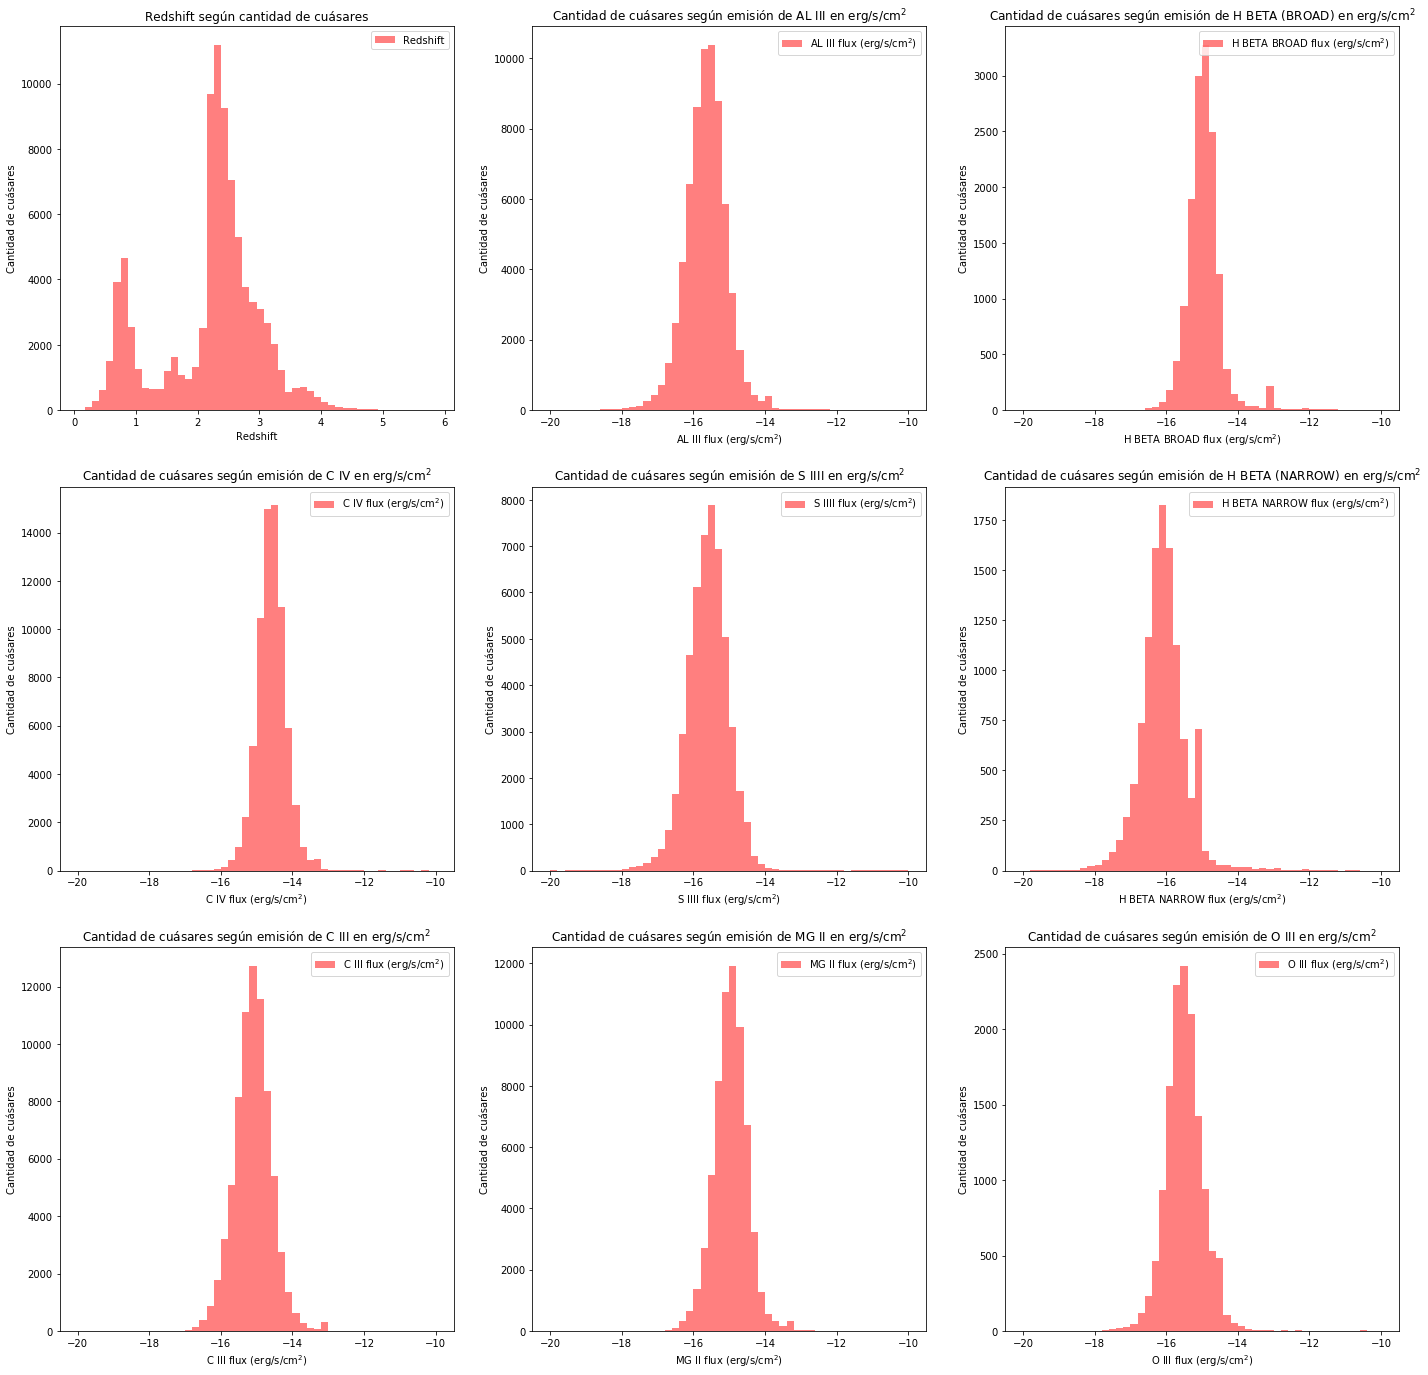

In [0]:
fig, ax = plt.subplots(figsize=(24,24), ncols=3, nrows=3)

redshift = QuasarTable2['Z_VI']
civ_flux = QuasarTable2['LOGF_CIV']
ciii_flux = QuasarTable2['LOGF_CIII']
aliii_flux = QuasarTable2['LOGF_ALIII']
siiii_flux = QuasarTable2['LOGF_SIIII']
mgii_flux = QuasarTable2['LOGF_MGII']
bhbeta_flux = QuasarTable2['LOGF_BROAD_HB']
nhbeta_flux = QuasarTable2['LOGF_NARROW_HB']
oiii_flux = QuasarTable2['LOGF_OIII_5007']

n = 'Cantidad de cuásares'

labels = [redshift, civ_flux, ciii_flux, aliii_flux, siiii_flux, mgii_flux, bhbeta_flux, nhbeta_flux, oiii_flux]
labels_s = ['Redshift', 'C IV flux $( \mathrm{erg/s/cm^2} )$', 'C III flux $( \mathrm{erg/s/cm^2} )$', 'AL III flux $( \mathrm{erg/s/cm^2} )$', 'S IIII flux $( \mathrm{erg/s/cm^2} )$',
            'MG II flux $( \mathrm{erg/s/cm^2} )$', 'H BETA BROAD flux $( \mathrm{erg/s/cm^2} )$', 'H BETA NARROW flux $( \mathrm{erg/s/cm^2} )$', 'O III flux $( \mathrm{erg/s/cm^2} )$']

# REDSHIFT
ax[0,0].hist(labels[0], color='r', label=labels_s[0], alpha=0.5, bins=50)
ax[0,0].set_title('Redshift según cantidad de cuásares')
ax[0,0].set_xlabel(labels_s[0])
ax[0,0].set_ylabel(n)
ax[0,0].legend(loc='best')

# C IV FLUX
ax[1,0].hist(labels[1], color='r', label=labels_s[1], alpha=0.5, bins=50, range=(-20,-10))
ax[1,0].set_title('Cantidad de cuásares según emisión de C IV en $ \mathrm{erg/s/cm^2} $')
ax[1,0].set_xlabel(labels_s[1])
ax[1,0].set_ylabel(n)
ax[1,0].legend(loc='best')

# C III FLUX
ax[2,0].hist(labels[2], color='r', label=labels_s[2], alpha=0.5, bins=50, range=(-20,-10))
ax[2,0].set_title('Cantidad de cuásares según emisión de C III en $ \mathrm{erg/s/cm^2} $')
ax[2,0].set_xlabel(labels_s[2])
ax[2,0].set_ylabel(n)
ax[2,0].legend(loc='best')

# AL III FLUX
ax[0,1].hist(labels[3], color='r', label=labels_s[3], alpha=0.5, bins=50, range=(-20,-10))
ax[0,1].set_title('Cantidad de cuásares según emisión de AL III en $ \mathrm{erg/s/cm^2} $')
ax[0,1].set_xlabel(labels_s[3])
ax[0,1].set_ylabel(n)
ax[0,1].legend(loc='best')

# S IIII FLUX
ax[1,1].hist(labels[4], color='r', label=labels_s[4], alpha=0.5, bins=50, range=(-20,-10))
ax[1,1].set_title('Cantidad de cuásares según emisión de S IIII en $ \mathrm{erg/s/cm^2} $')
ax[1,1].set_xlabel(labels_s[4])
ax[1,1].set_ylabel(n)
ax[1,1].legend(loc='best')

# MG II FLUX
ax[2,1].hist(labels[5], color='r', label=labels_s[5], alpha=0.5, bins=50, range=(-20,-10))
ax[2,1].set_title('Cantidad de cuásares según emisión de MG II en $ \mathrm{erg/s/cm^2} $')
ax[2,1].set_xlabel(labels_s[5])
ax[2,1].set_ylabel(n)
ax[2,1].legend(loc='best')

# BROAD H BETA FLUX
ax[0,2].hist(labels[6], color='r', label=labels_s[6], alpha=0.5, bins=50, range=(-20,-10))
ax[0,2].set_title('Cantidad de cuásares según emisión de H BETA (BROAD) en $ \mathrm{erg/s/cm^2} $')
ax[0,2].set_xlabel(labels_s[6])
ax[0,2].set_ylabel(n)
ax[0,2].legend(loc='best')

# NARROW H BETA FLUX
ax[1,2].hist(labels[7], color='r', label=labels_s[7], alpha=0.5, bins=50, range=(-20,-10))
ax[1,2].set_title('Cantidad de cuásares según emisión de H BETA (NARROW) en $ \mathrm{erg/s/cm^2} $')
ax[1,2].set_xlabel(labels_s[7])
ax[1,2].set_ylabel(n)
ax[1,2].legend(loc='best')

# O III FLUX
ax[2,2].hist(labels[8], color='r', label=labels_s[8], alpha=0.5, bins=50, range=(-20,-10))
ax[2,2].set_title('Cantidad de cuásares según emisión de O III en $ \mathrm{erg/s/cm^2} $')
ax[2,2].set_xlabel(labels_s[8])
ax[2,2].set_ylabel(n)
ax[2,2].legend(loc='best')

In [0]:
#NAMES=[SDSS_NAME, Z_VI, LOGF_CIV, LOGF_CIII,LOGF_ALIII, LOGF_SIIII, 
       #LOGF_MGII, LOGF_BROAD_HB,LOGF_NARROW_HB, LOGF_OIII_5007]

data_quasar = data_quasar[data_quasar.Z_VI != 0]
data_quasar = data_quasar[data_quasar.LOGF_CIV != 0]
data_quasar = data_quasar[data_quasar.LOGF_CIII != 0]
data_quasar = data_quasar[data_quasar.LOGF_ALIII != 0]
data_quasar = data_quasar[data_quasar.LOGF_SIIII != 0]
data_quasar = data_quasar[data_quasar.LOGF_MGII != 0]
#data_quasar = data_quasar[data_quasar.LOGF_BROAD_HB != 0]
#data_quasar = data_quasar[data_quasar.LOGF_NARROW_HB != 0]
#data_quasar = data_quasar[data_quasar.LOGF_OIII_5007 != 0]
data_quasar 

,SDSS_NAME,Z_VI,LOGF_CIV,LOGF_CIII,LOGF_ALIII,LOGF_SIIII,LOGF_MGII,LOGF_BROAD_HB,LOGF_NARROW_HB,LOGF_OIII_5007,class
1,000001.93-001427.4,2.163,-14.365272,-15.148777,-15.615987,-14.696219,-15.051001,0.0,0.0,0.0,QUASAR
5,000005.02-003829,2.662,-14.737058,-15.052214,-15.312190,-15.847419,-14.202603,0.0,0.0,0.0,QUASAR
12,000017.97+002426.9,2.281,-14.564166,-15.173194,-16.328882,-15.526432,-15.023266,0.0,0.0,0.0,QUASAR
13,000018.12+013637.1,2.400,-14.472973,-15.231678,-15.931496,-15.877745,-15.178575,0.0,0.0,0.0,QUASAR
14,000018.18+050803.6,2.227,-14.321572,-14.702217,-15.691818,-15.283966,-15.105398,0.0,0.0,0.0,QUASAR
22,000026.75+020911.7,2.237,-14.294118,-14.829801,-15.490664,-15.263438,-14.881000,0.0,0.0,0.0,QUASAR
23,000027.01+030715.5,2.343,-13.984467,-14.124638,-15.289569,-15.488623,-14.377969,0.0,0.0,0.0,QUASAR
24,000027.31+013126.1,2.589,-14.636703,-15.319518,-15.991553,-15.610863,-15.118730,0.0,0.0,0.0,QUASAR
26,000029.99+004845.3,2.412,-14.870530,-15.291307,-16.347170,-16.574561,-15.550596,0.0,0.0,0.0,QUASAR
28,000031.27-010350.7,2.416,-14.634846,-15.102484,-15.979819,-15.841510,-15.142708,0.0,0.0,0.0,QUASAR


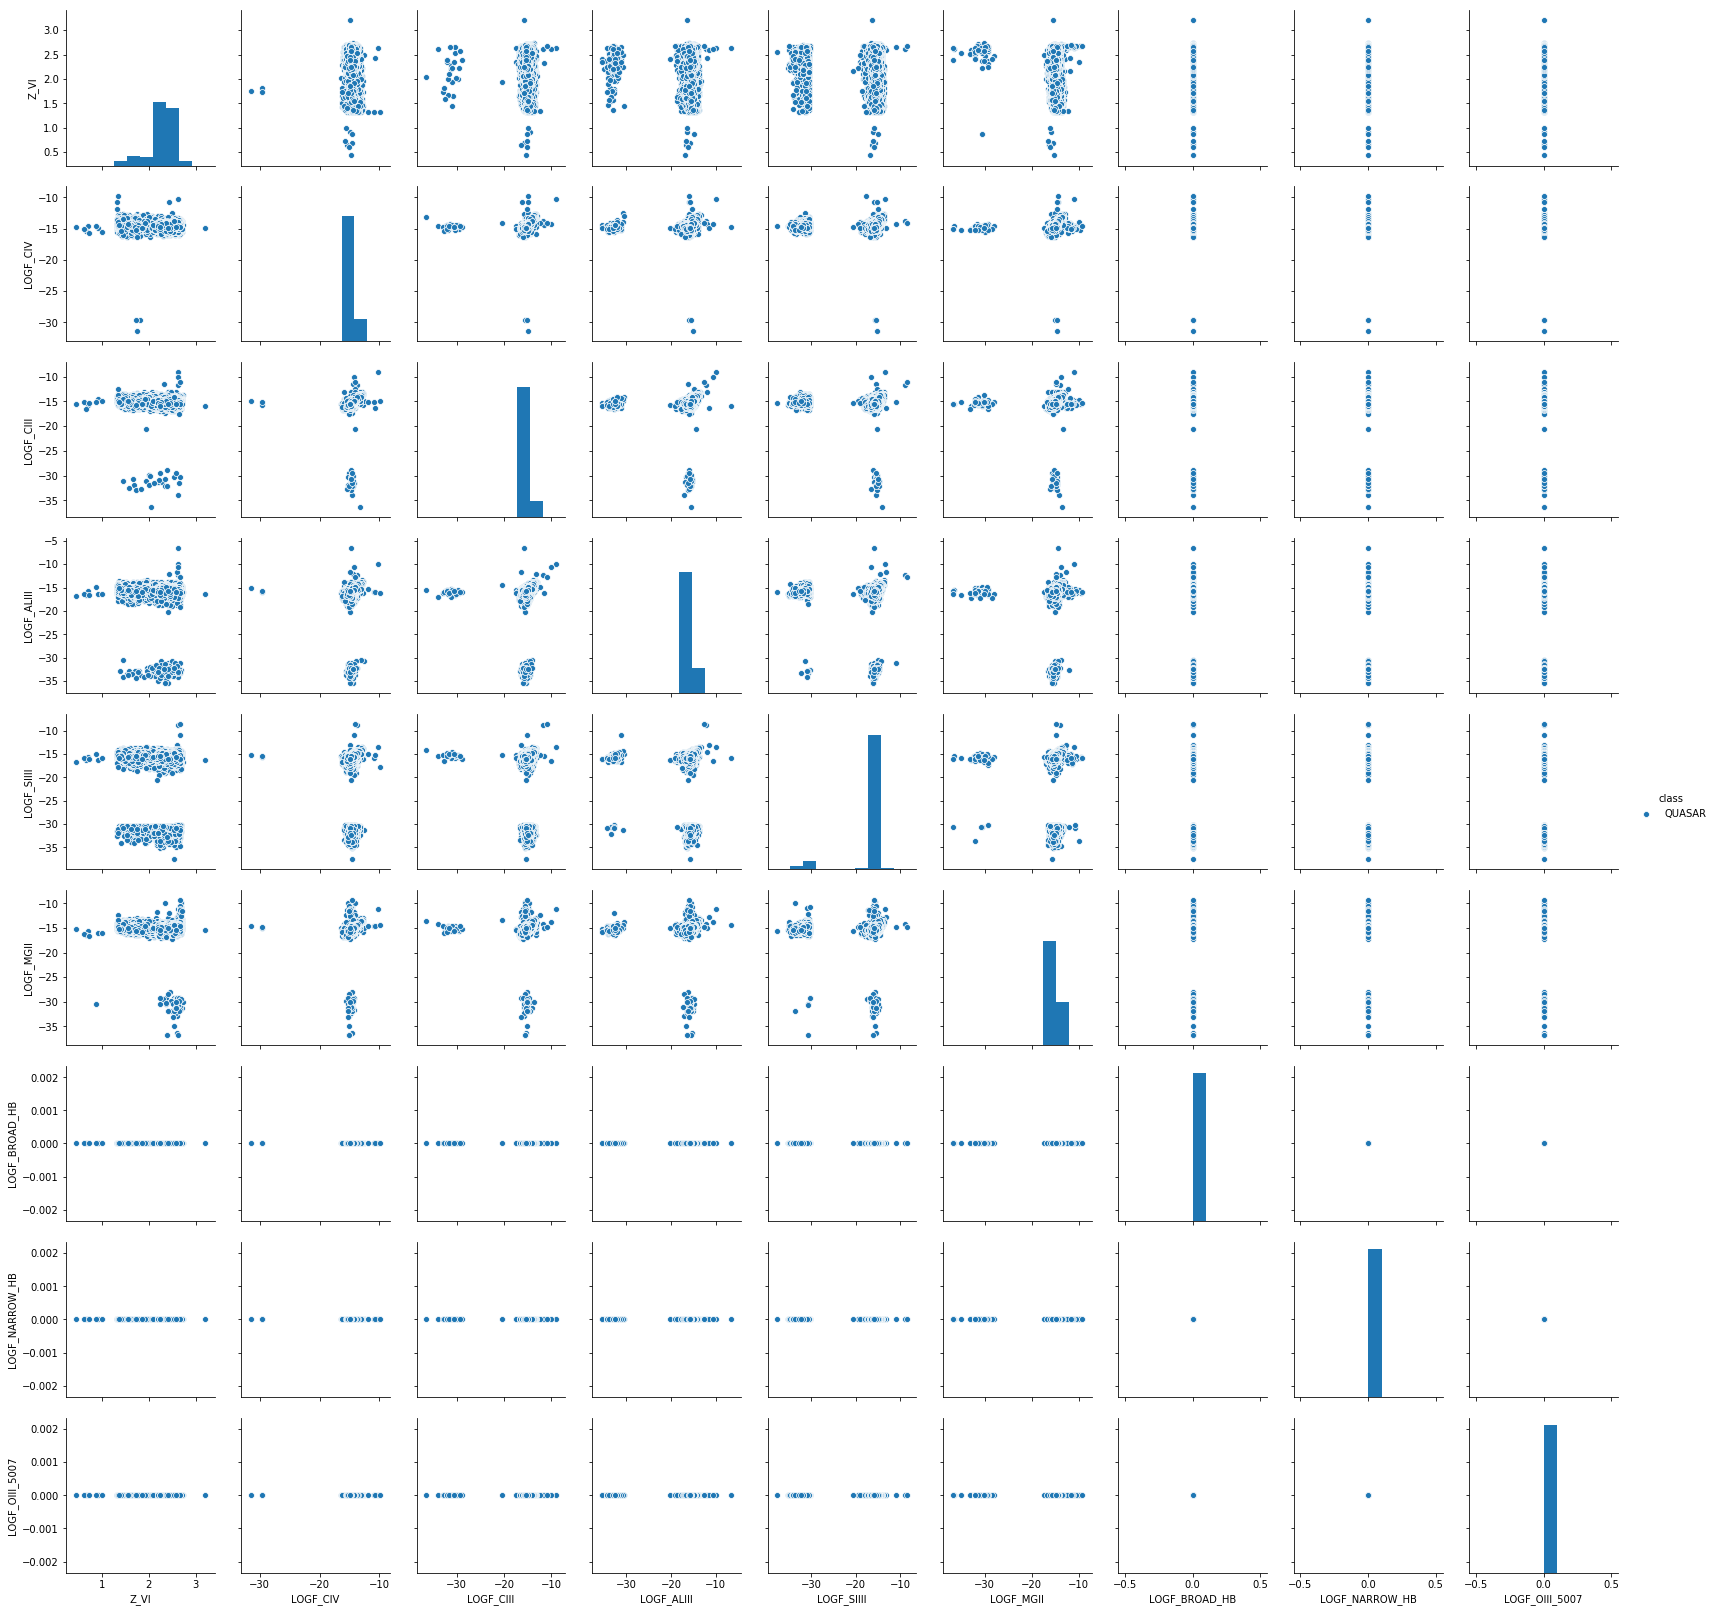

In [0]:
sns.pairplot(data_quasar, hue='class', diag_kind = 'hist')